this dataset is pacificrm includes all skin tones.

includes 22 types of skin diseases:


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pacificrm/skindiseasedataset")

print("Path to dataset files:", path)

100%|██████████| 1.36G/1.36G [00:17<00:00, 84.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pacificrm/skindiseasedataset/versions/6


In [2]:
import os
print(os.listdir(path))

['SkinDisease', 'Readme.md']


In [3]:
skin_path = os.path.join(path, "SkinDisease")
print(os.listdir(skin_path))

['SkinDisease']


In [4]:
skin_path1 = os.path.join(skin_path,"SkinDisease")
print(os.listdir(skin_path1))

['train', 'test']


In [5]:
train_path = os.path.join(skin_path1,"train")
print(os.listdir(train_path))

['Actinic_Keratosis', 'Psoriasis', 'Lichen', 'Sun_Sunlight_Damage', 'Bullous', 'Vascular_Tumors', 'Unknown_Normal', 'Infestations_Bites', 'Candidiasis', 'Vasculitis', 'Rosacea', 'Eczema', 'SkinCancer', 'DrugEruption', 'Seborrh_Keratoses', 'Warts', 'Lupus', 'Acne', 'Benign_tumors', 'Vitiligo', 'Moles', 'Tinea']


In [6]:
#lets just first try with bullows:
path_bullous = os.path.join(train_path,"Bullous")
print(os.listdir(path_bullous)[:5])

['images331.jpeg', 'te-or-chronic-autoimmune-skin-disease-involving-the-formation-of-bli-2BFENJT.jpeg', 'images169.jpeg', 'dermatitis-herpetiformis-7.jpeg', 'diabetic-bullae-8.jpeg']


In [ ]:
def to_tensor(img):
    img = img.astype(np.float32)/255.0        # Normalize 0–1
    img = np.transpose(img,(2,0,1))          # HWC → CHW
    return torch.tensor(img).float().unsqueeze(0)
#why do we do this?

In [7]:
#to reduce bias from skin tone, lighting ,etc we use color conversion.

#lets read these images:
import cv2
import numpy as np

images = []
for file_name in os.listdir(path_bullous):
  img_path = os.path.join(path_bullous, file_name)
  img = cv2.imread(img_path) #these images are numpy arrays of its pixels!
  #image has been resized for CNN model, size varies with model
  resized_img = cv2.resize(img,(128,128),interpolation=cv2.INTER_CUBIC)
  images.append(resized_img)
  #color conversion to emphasize on lesion color
  #hsv = cv2.cvtColor(resized_img,cv2.COLOR_BGR2HSV)
  #ycrcb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2YCR_CB)
  #images.append(hsv)


In [8]:
print(images[0][:5])
#you can see these pixel values
#0-256
#now we also know that the image is rgb ,neither gray scale nor black and white

[[[119 140 196]
  [119 140 195]
  [127 148 203]
  ...
  [193 190 197]
  [190 188 194]
  [191 189 195]]

 [[118 140 193]
  [124 145 200]
  [130 152 206]
  ...
  [196 193 201]
  [196 194 200]
  [197 195 201]]

 [[120 142 193]
  [131 152 207]
  [135 156 211]
  ...
  [202 199 205]
  [202 200 206]
  [203 201 207]]

 [[126 148 200]
  [131 154 205]
  [134 154 210]
  ...
  [204 202 207]
  [204 203 207]
  [205 204 208]]

 [[134 157 207]
  [130 151 204]
  [131 153 204]
  ...
  [202 200 205]
  [202 201 205]
  [204 203 207]]]


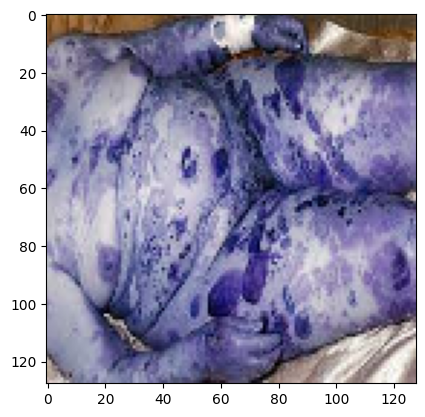

In [9]:
import matplotlib.pyplot as plt
plt.imshow(images[113])